In [1]:
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


## Rading and Modifying data files

In [2]:
# .set_option() changes behavior globaly in Jupyter Notebooks, so it is not a temporary fix.

pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Or to almost completely suppress scientific notation without losing precision, try this:
#pd.set_option('display.float_format', str)

#### Cab_Data

In [3]:
Cab_Data=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")

In [4]:
Cab_Data['Profit']=(Cab_Data['Price Charged']-Cab_Data['Cost of Trip'])*Cab_Data['KM Travelled']

In [ ]:
Cab_Data

In [ ]:
Cab_Data.describe()

#### City_Data

In [5]:
city_Data=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")

In [ ]:
type(city_Data.loc[2,'Population'])

In [6]:
city_Data = city_Data.applymap(lambda x: x.replace(',', ''))
city_Data['Population'] = pd.to_numeric(city_Data['Population'])
city_Data['Users'] = pd.to_numeric(city_Data['Users'])

In [7]:
# Sanfransico has no data in other data sets, we remove

delindex=city_Data[city_Data['City']=='SAN FRANCISCO CA'].index

city_Data.drop(delindex, inplace=True)
city_Data

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


#### Customer_ID

In [8]:

Customer_ID=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")

In [ ]:
Customer_ID.columns

In [ ]:
Customer_ID.describe()

In [ ]:
Customer_ID

#### Transaction_ID

In [9]:
Transaction_ID=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")

In [ ]:
Transaction_ID

# Joining tables

In [10]:
trc= Transaction_ID.join(Cab_Data.set_index('Transaction ID'), on='Transaction ID')


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,42377.00,Pink Cab,ATLANTA GA,30.45,370.95,313.63,1745.24
1,10000012,27703,Card,42375.00,Pink Cab,ATLANTA GA,28.62,358.52,334.85,677.32
2,10000013,28712,Cash,42371.00,Pink Cab,ATLANTA GA,9.04,125.20,97.63,249.21
3,10000014,28020,Cash,42376.00,Pink Cab,ATLANTA GA,33.17,377.40,351.60,855.72
4,10000015,27182,Card,42372.00,Pink Cab,ATLANTA GA,8.73,114.62,97.78,147.05
...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,43104.00,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,57.98
440094,10440105,52265,Cash,43105.00,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2425.91
440095,10440106,52175,Card,43105.00,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,282.85
440096,10440107,52917,Card,43102.00,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,178.14


In [11]:
tcc= trc.join(Customer_ID.set_index('Customer ID'), on='Customer ID')


#### Converting date

In [13]:
tcc['Date'] = pd.to_datetime(tcc['Date of Travel'], origin=pd.Timestamp('1900-01-01'), unit='d')

In [48]:
tcc

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Date
0,10000011,29290,Card,42377.00,Pink Cab,ATLANTA GA,30.45,370.95,313.63,1745.24,Male,28,10813,2016-01-10
1,10000012,27703,Card,42375.00,Pink Cab,ATLANTA GA,28.62,358.52,334.85,677.32,Male,27,9237,2016-01-08
2,10000013,28712,Cash,42371.00,Pink Cab,ATLANTA GA,9.04,125.20,97.63,249.21,Male,53,11242,2016-01-04
3,10000014,28020,Cash,42376.00,Pink Cab,ATLANTA GA,33.17,377.40,351.60,855.72,Male,23,23327,2016-01-09
4,10000015,27182,Card,42372.00,Pink Cab,ATLANTA GA,8.73,114.62,97.78,147.05,Male,33,8536,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,43104.00,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,57.98,Male,32,6528,2018-01-06
440094,10440105,52265,Cash,43105.00,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2425.91,Male,56,7966,2018-01-07
440095,10440106,52175,Card,43105.00,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,282.85,Male,32,6423,2018-01-07
440096,10440107,52917,Card,43102.00,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,178.14,Male,20,11284,2018-01-04


#### Separating data of Pink and Yellow

In [26]:
pink = tcc[tcc['Company'] == 'Pink Cab']
yellow = tcc[tcc['Company'] == 'Yellow Cab']

In [ ]:
pink

### Aggregation of some varibles by indexing city

In [ ]:
sumcity=pd.pivot_table(tcc,index='City',values=['Price Charged','Cost of Trip','KM Travelled', 'Profit'],aggfunc='sum').reset_index()

In [ ]:
sumcity.columns=['City', 'Total Cost of Trip','KM Travelled','Total Price Charged', 'Profit']

In [ ]:
sumcity

#### Aggregation of some varibles of Pink company indexing city

In [ ]:
sumcity_pink=pd.pivot_table(pink,index='City',values=['Price Charged','Cost of Trip','KM Travelled', 'Profit'],aggfunc='sum').reset_index()

In [ ]:
sumcity_pink.columns=['City', 'Total Cost of Trip','KM Travelled','Total Price Charged', 'Profit']

In [ ]:
sumcity_pink

#### Aggregation of some varibles of Yellow company indexing city

In [ ]:
sumcity_yellow=pd.pivot_table(yellow,index='City',values=['Price Charged','Cost of Trip','KM Travelled', 'Profit'],aggfunc='sum').reset_index()

In [ ]:
sumcity_yellow.columns=['City', 'Total Cost of Trip','KM Travelled','Total Price Charged', 'Profit']

In [ ]:
sumcity_yellow

## Plotting

#### Profit across Cities

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = sumcity['City']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, sumcity['Profit'],width,  label='Total')
rects2 = ax.bar(x , sumcity_pink['Profit'],width, label='Pink')
rects3 = ax.bar(x + width, sumcity_yellow['Profit'],width, label='Yellow')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profit', fontsize=20)
ax.set_title('Profit across Cities', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

#### Profit per City population


In [ ]:
sumcity_pop=pd.merge(sumcity,city_Data,on='City',how='right')
sumcity_pop

In [ ]:
sumcity_pop['Profit per Population']= (sumcity_pop['Profit'] / sumcity_pop['Population'])

In [ ]:
sumcity_pop['Profit per Population'].astype(float)
sumcity_pop['Profit per Population']=sumcity_pop['Profit per Population'].apply(lambda x: '%.5f' % x) 
sumcity_pop['Profit per Population'] = pd.to_numeric(sumcity_pop['Profit per Population'])

In [ ]:
type(sumcity_pop.loc[1,'Profit per Population'])

In [ ]:
sumcity_pop.sort_values(by='Profit per Population',ascending=False)

In [ ]:
pop_times_thousand = sumcity_pop['Population']/10000

#### Ploting Bar chart of Profit per City Population

In [ ]:

labels = sumcity_pop['City']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))


rects1 = ax.bar(x - width/2, sumcity_pop['Profit per Population'],width,  label='Profit per Population')
#rects2 = ax.bar(x , sumcity_pink['Profit'],width, label='Pink')
rects3 = ax.bar(x + width/2, pop_times_thousand,width, label='Population / 10000')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profit', fontsize=20)
ax.set_title('Profit across Cities', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

NameError: name 'sumcity_pop' is not defined

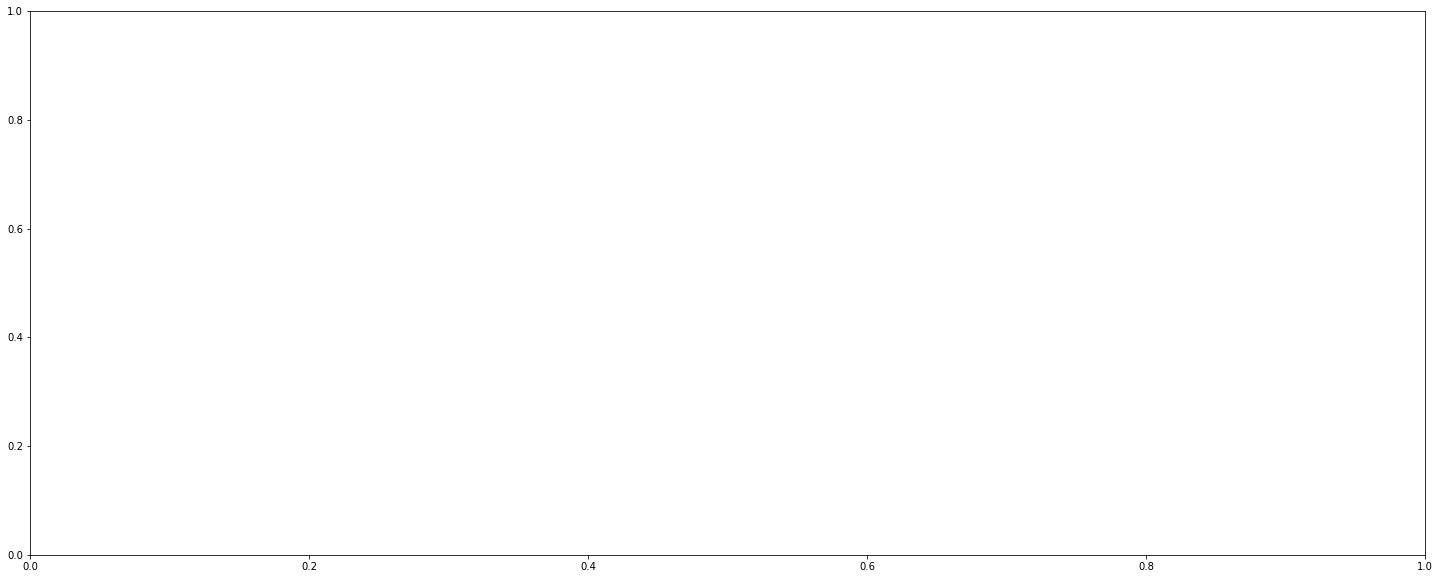

In [51]:


f, ax = plt.subplots(figsize=(25,10)) # set the size that you'd like (width, height)

plt.bar(sumcity_pop['City'], sumcity_pop['Profit per Population'])
plt.bar(sumcity_pop['City'], sumcity_pop['Profit'])

#plt.bar([10,11,12,13], [0.4,0.3,0.2,0.1], label = 'second bar')
ax.legend(fontsize = 14)
ax.set_title('Profit per City Population', fontsize=20)

ax.set_xticklabels(labels, fontdict=None, minor=False, rotation=45)



### Groupby Customer ID for analysizing Customer Retension

In [14]:
cusnum = tcc.groupby(['Customer ID']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()
cusnum

,Customer ID,Age,Income (USD/Month),Profit,Transaction ID
0,1,36,16359,8400.89,29
1,2,31,12069,8765.69,40
2,3,27,12968,7152.42,46
3,4,33,13803,9606.26,26
4,5,24,9965,10065.55,31
...,...,...,...,...,...
49166,59996,51,16634,-169.76,4
49167,59997,63,22352,1652.40,10
49168,59998,23,5678,2424.83,9
49169,59999,38,24577,981.84,8


In [15]:
def checkFunc(x):
    if x < 3:
        return 'trips < 3 '
    elif x < 5:
        return '2 < trips <5'
    elif x < 10:
        return '4 < trips <10'
    else:
        return '10 < trips'

In [16]:
cusnum['trips'] = cusnum['Transaction ID'].apply(lambda x: checkFunc(x))
cusnum['trips'] = pd.DataFrame(cusnum['trips'])
cusnum


,Customer ID,Age,Income (USD/Month),Profit,Transaction ID,trips
0,1,36,16359,8400.89,29,10 < trips
1,2,31,12069,8765.69,40,10 < trips
2,3,27,12968,7152.42,46,10 < trips
3,4,33,13803,9606.26,26,10 < trips
4,5,24,9965,10065.55,31,10 < trips
...,...,...,...,...,...,...
49166,59996,51,16634,-169.76,4,2 < trips <5
49167,59997,63,22352,1652.40,10,10 < trips
49168,59998,23,5678,2424.83,9,4 < trips <10
49169,59999,38,24577,981.84,8,4 < trips <10


### Groupby trips

In [17]:
real_value = cusnum.groupby(['trips']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'count'}).reset_index()
real_value

,trips,Age,Income (USD/Month),Profit,Transaction ID
0,10 < trips,35.40,15097.27,3496.31,16623
1,2 < trips <5,35.47,14814.31,3280.45,7739
2,4 < trips <10,35.01,15078.95,2571.24,5518
3,trips < 3,35.38,15007.94,2902.02,19291


In [18]:
perc = cusnum.groupby(['trips']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'count'}).transform(lambda x: x/sum(x)).reset_index()
perc

,trips,Age,Income (USD/Month),Profit,Transaction ID
0,10 < trips,0.25,0.25,0.29,0.34
1,2 < trips <5,0.25,0.25,0.27,0.16
2,4 < trips <10,0.25,0.25,0.21,0.11
3,trips < 3,0.25,0.25,0.24,0.39


In [49]:
cusnum = tcc.groupby(['Payment_Mode']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()
cusnum

,Payment_Mode,Age,Income (USD/Month),Profit,Transaction ID
0,Card,35.38,15085.42,861499006.94,263991
1,Cash,35.33,15102.31,577864720.57,176107


#### Groupby trips - Pie chart

(-1.1808044748660087,
 1.2526286199448204,
 -1.1832358145901378,
 1.2518989863766914)

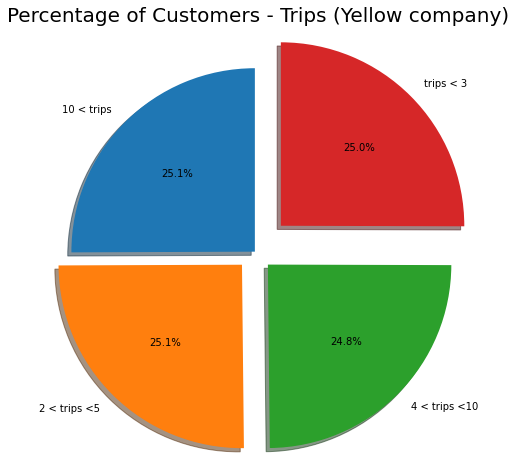

In [19]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = perc.iloc[:,0]
sizes = perc.iloc[:,1]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Customers - Trips (Yellow company) ', fontsize=20)

plt.axis('equal')

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = perc.iloc[:,0]
sizes = perc.iloc[:,3]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Profit - Trips (Yellow company) ', fontsize=20)

plt.axis('equal')

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = perc.iloc[:,0]
sizes = perc.iloc[:,3]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Profit - Trips (Pink company) ', fontsize=20)

plt.axis('equal')

In [20]:
real_value = cusnum.groupby(['trips']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'count'}).reset_index()
real_value

,trips,Age,Income (USD/Month),Profit,Transaction ID
0,10 < trips,35.40,15097.27,3496.31,16623
1,2 < trips <5,35.47,14814.31,3280.45,7739
2,4 < trips <10,35.01,15078.95,2571.24,5518
3,trips < 3,35.38,15007.94,2902.02,19291


In [21]:
real_value['Income (USD/Month)'] = pd.to_numeric(real_value['Income (USD/Month)'])
real_value['Profit'] = pd.to_numeric(real_value['Profit'])


#### Groupby trips - Line chart

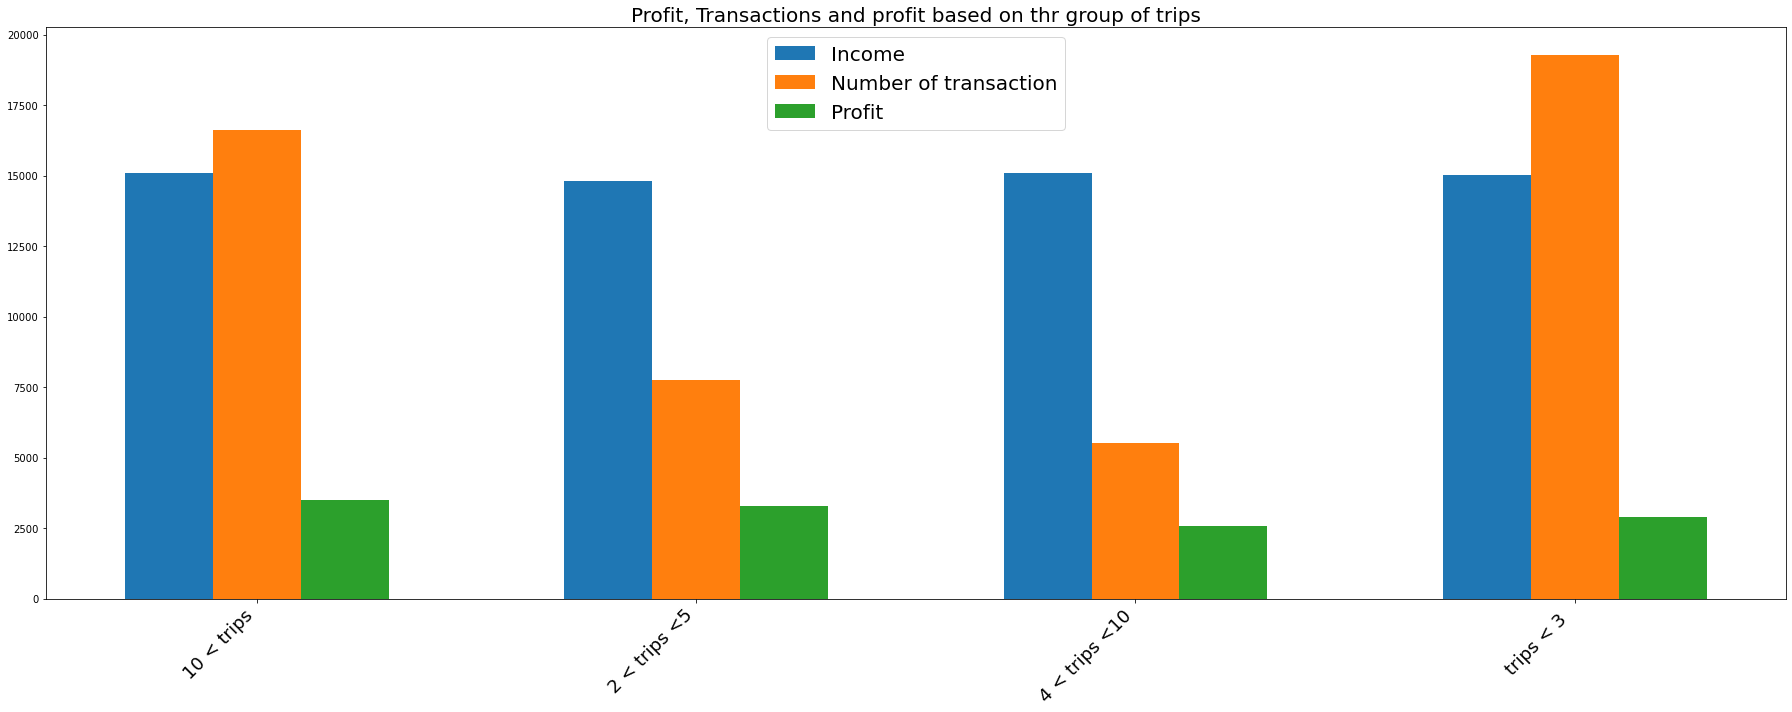

In [22]:

labels = real_value['trips']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, real_value['Income (USD/Month)'],width,  label='Income')
rects2 = ax.bar(x , real_value['Transaction ID'],width, label='Number of transaction')
rects3 = ax.bar(x + width, real_value['Profit'],width, label='Profit')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Profit, Transactions and profit based on thr group of trips', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

### Groupby Date 

In [31]:
tcc_mean = tcc.groupby(['Date']).agg({'KM Traveled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

pink_mean = pink.groupby(['Date']).agg({'KM Traveled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

yellow_mean = yellow.groupby(['Date']).agg({'KM Traveled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()


SpecificationError: Column(s) ['KM Traveled'] do not exist

In [28]:
tcc_sum = tcc.groupby(['Customer ID']).agg({'KM Traveled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

pink_sum = pink.groupby(['Customer ID']).agg({'KM Traveled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

yellow_sum = yellow.groupby(['Customer ID']).agg({'KM Traveled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()


#### Seasonal poltting

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

df = date_pr.loc[:,['Date','Profit']]
df.set_index('Date', inplace=True)

# Decompose 
result = seasonal_decompose(df['Profit'], model='multiplicative') # or additive

# Plot
plt.rcParams.update({'figure.figsize': (20,20), 'font.size': 15})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color='g')

# default cycle is: `['b', 'g', 'r', 'c', 'm', 'y', 'k']`
#matplotlib.rcParams.update({'font.size': 15})
result.plot()
#result.plot().suptitle('Time Series Decomposition of Distance Travelled')
plt.show()

### Distance travelled by dates 

In [33]:
pink_sum['KM Travelled'].describe()


count   32330.00
mean       59.11
std        53.58
min         1.90
25%        22.68
50%        39.96
75%        79.46
max       457.52
Name: KM Travelled, dtype: float64

In [34]:
yellow_sum[yellow_sum['KM Travelled']==1231.77]


,Customer ID,KM Travelled,Income (USD/Month),Profit,Transaction ID
125,126,1231.77,10637,508656.43,45


In [ ]:
tcc[tcc['Customer ID']==126]


In [32]:
def checkFunc(x):
    if x < 20:
        return 'Distance travelled < 20'
    elif x < 40:
        return '20 < Distance travelled < 40'
    elif x < 60:
        return '40 < Distance travelled < 60'
    elif x < 80:
        return '60 < Distance travelled < 80'
    elif x < 100:
        return '80 < Distance travelled < 100'
    else:
        return '100 < Distance travelled'

In [35]:
tcc_sum['travelled'] = tcc_sum['KM Travelled'].apply(lambda x: checkFunc(x))

pink_sum['travelled'] = pink_sum['KM Travelled'].apply(lambda x: checkFunc(x))

yellow_sum['travelled'] = yellow_sum['KM Travelled'].apply(lambda x: checkFunc(x))

tcc_sum


,Customer ID,KM Travelled,Income (USD/Month),Profit,Transaction ID,travelled
0,1,708.33,16359,243625.76,29,100 < Distance travelled
1,2,932.37,12069,350627.55,40,100 < Distance travelled
2,3,1037.41,12968,329011.47,46,100 < Distance travelled
3,4,646.92,13803,249762.82,26,100 < Distance travelled
4,5,732.08,9965,312032.02,31,100 < Distance travelled
...,...,...,...,...,...,...
49166,59996,61.72,16634,-679.02,4,60 < Distance travelled < 80
49167,59997,278.31,22352,16524.02,10,100 < Distance travelled
49168,59998,233.73,5678,21823.50,9,100 < Distance travelled
49169,59999,163.63,24577,7854.71,8,100 < Distance travelled


In [36]:
tcc_sum_n = tcc_sum.groupby(['travelled']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

pink_sum_n = pink_sum.groupby(['travelled']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

yellow_sum_n = yellow_sum.groupby(['travelled']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()


In [37]:
tcc_sum_n

,travelled,KM Travelled,Income (USD/Month),Profit,Transaction ID
0,100 < Distance travelled,355.47,15042.67,1293026379.74,19703
1,20 < Distance travelled < 40,30.52,14954.28,30077473.39,8460
2,40 < Distance travelled < 60,48.80,15061.76,38488679.73,5711
3,60 < Distance travelled < 80,69.55,14784.95,40300627.25,4001
4,80 < Distance travelled < 100,89.16,14865.56,33988827.57,2551
5,Distance travelled < 20,7.32,15133.25,3481739.83,8745


### Groupby distance travelled - Bar chart

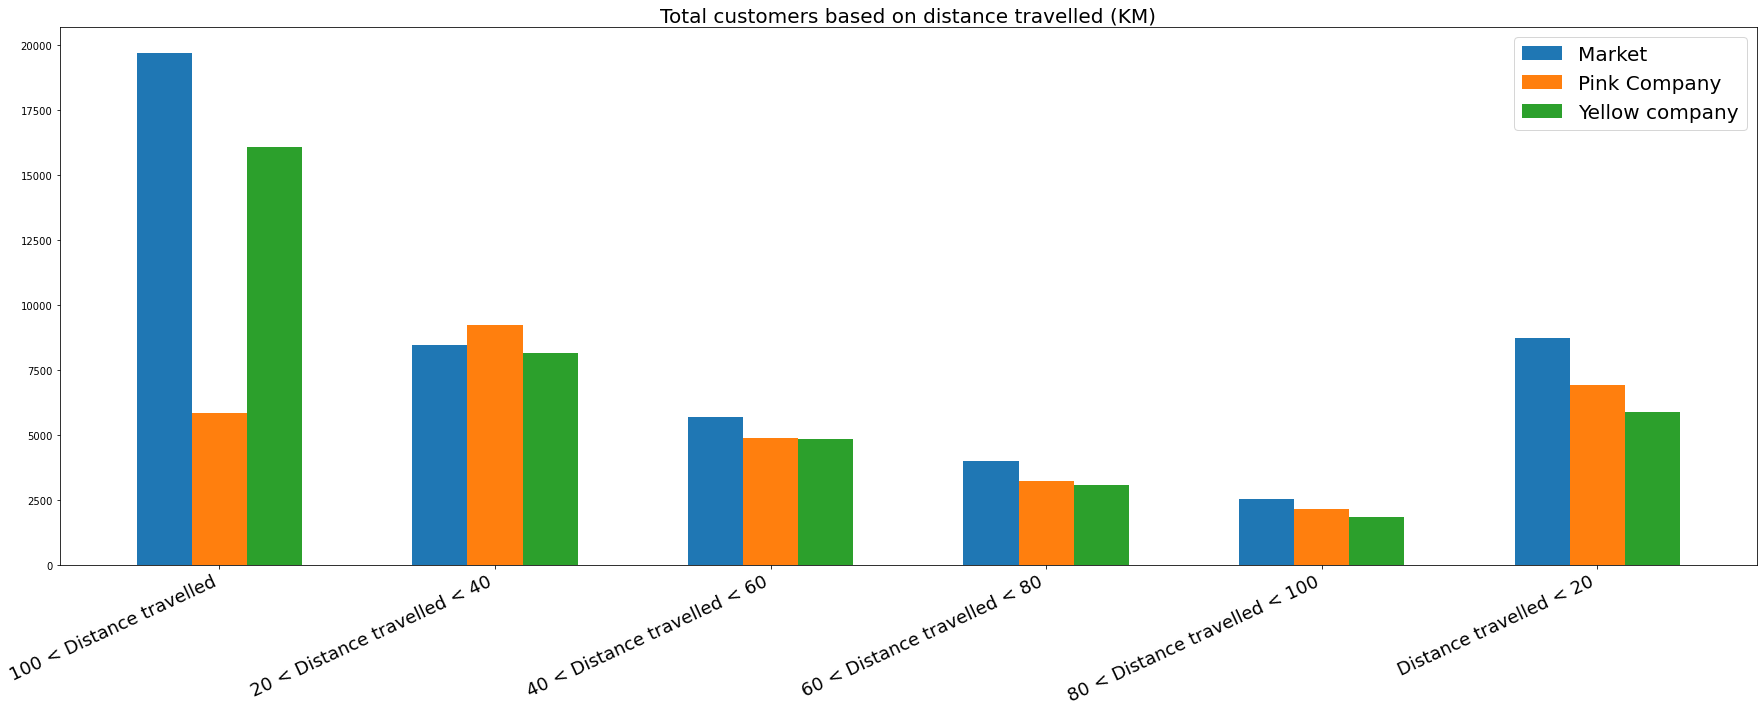

In [47]:

labels = tcc_sum_n['travelled']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, tcc_sum_n['Transaction ID'],width,  label='Market')
rects2 = ax.bar(x , pink_sum_n['Transaction ID'],width, label='Pink Company')
rects3 = ax.bar(x + width, yellow_sum_n['Transaction ID'],width, label='Yellow company')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Total customers based on distance travelled (KM)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=25,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

In [ ]:

df = date_pr.loc[:,['Date','Transaction ID']]
df.set_index('Date', inplace=True)
df=df.astype(float)
df

In [ ]:
for col in df.loc[:, :]:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # coercing any errors to NaN

In [ ]:
type(df.iloc[4,0])

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

for column in df:
    # Plot each line separately with its own color.
   # column_rec_name = column.replace('\n', '_').replace(' ', '_')

    line, = ax.plot(df.index, df["Transaction ID"],  lw=2.5)
    
plt.show()

